# Funnel Analysis Project

#### Load Data

In [3]:
import pandas as pd

In [4]:
# Load the dataset
data = pd.read_csv(r"C:\Users\dthan\Downloads\lightweight_ecommerce_sample.csv")

In [5]:
df = pd.DataFrame(data)

# View first few rows
df.head()

,user_id,event_time,event_type,product_id,category_code,brand,price
0,1102,3/4/2023 22:42,view,5073,electronics.smartphone,Samsung,870.90
1,1435,1/1/2023 22:32,view,5008,electronics.smartphone,Nike,1484.46
2,1860,2/27/2023 23:02,view,5084,electronics.audio,Samsung,1039.52
3,1270,2/13/2023 2:42,view,5076,electronics.smartphone,Nike,1112.26
4,1106,2/12/2023 7:23,view,5009,apparel.shoes,IKEA,57.82


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   event_time     10000 non-null  object 
 2   event_type     10000 non-null  object 
 3   product_id     10000 non-null  int64  
 4   category_code  10000 non-null  object 
 5   brand          10000 non-null  object 
 6   price          10000 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 547.0+ KB


*No null/missing values in the data*

#### Convert Date Columns

*event_time* is text by default, we convert it to a datetime to do time-based calculations like DAU or retention.

In [7]:
# Convert string to datetime format
df["event_time"] = pd.to_datetime(df['event_time'])

# Extract useful parts
df["date"] = df["event_time"].dt.date
df["week"] = df["event_time"].dt.isocalendar().week

In [8]:
df.head()

,user_id,event_time,event_type,product_id,category_code,brand,price,date,week
0,1102,2023-03-04 22:42:00,view,5073,electronics.smartphone,Samsung,870.90,2023-03-04,9
1,1435,2023-01-01 22:32:00,view,5008,electronics.smartphone,Nike,1484.46,2023-01-01,52
2,1860,2023-02-27 23:02:00,view,5084,electronics.audio,Samsung,1039.52,2023-02-27,9
3,1270,2023-02-13 02:42:00,view,5076,electronics.smartphone,Nike,1112.26,2023-02-13,7
4,1106,2023-02-12 07:23:00,view,5009,apparel.shoes,IKEA,57.82,2023-02-12,6


#### Funnel Counts

How many views, carts, and purchases are in the dataset.

In [9]:
# Count how many events of each type
df["event_type"].value_counts()

event_type
view        7004
cart        2029
purchase     967
Name: count, dtype: int64

#### Funnel Conversion Rates

view_to_cart, cart_to_purchase, view_to_purchase are *funnel conversion metrics*

- view_to_cart: Tells you how effective the product detail or search page is in encouraging users to go further.

- cart_to_puchase: This is your checkout efficiency metric. If this is low, you may have:
    - Long checkout forms
    - Hidden costs (like shipping)
    - Payment issues

- view_to_purchase: Overall funnel efficiency

In [10]:
#unique user at each stage
views = df[df["event_type"] == "view"]["user_id"].nunique()
carts = df[df["event_type"] == "cart"]["user_id"].nunique()
purchases = df[df["event_type"] == "purchase"]["user_id"].nunique()

#conversion calculations
view_to_cart = carts/views
cart_to_purchase = purchases/carts
view_to_purchase = purchases/views

view_to_cart, cart_to_purchase, view_to_purchase

(0.8575727181544633, 0.7169590643274854, 0.6148445336008024)

#### DAU (Daily Active Users)

Group data by date and count how many unique users were active on each day.

In [11]:
dau = df.groupby('date')['user_id'].nunique()

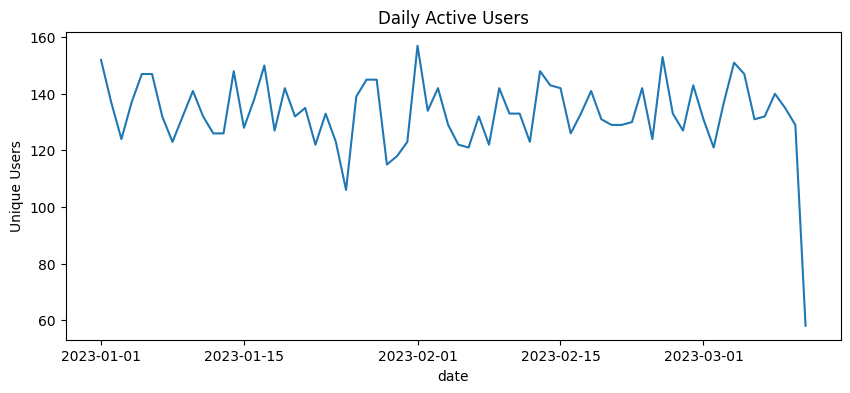

In [12]:
# plot

import matplotlib.pyplot as plt
dau.plot(title = 'Daily Active Users', figsize = (10,4))
plt.ylabel('Unique Users')
plt.show()

#### User Retention (basic)

Tracking the users returned on Day 1 and Day 7 after their first interaction.

In [ ]:
# Find each user's first activity date
first_seen = df.groupby('user_id')['event_time'].min().reset_index()
first_seen.columns = ['user_id', 'first_seen']
df = df.merge(first_seen, on='user_id')

# Calculate how many days since their first event
df['days_since_first'] = (df['event_time'] - df['first_seen']).dt.days

# Count returning users
retention_day_1 = df[df['days_since_first'] == 1]['user_id'].unique()
retention_day_7 = df[df['days_since_first'] == 7]['user_id'].unique()
retention_day_1, retention_day_7

(array([1458, 1099, 1564, 1929, 1502, 1014, 1972, 1189, 1696, 1895, 1851,
        1674, 1089, 1098, 1150, 1507, 1708, 1097, 1307, 1003, 1844, 1318,
        1992, 1982, 1430, 1629, 1768, 1287, 1026, 1147, 1136, 1804, 1016,
        1284, 1083, 1604, 1105, 1316, 1334, 1256, 1155, 1205, 1262, 1885,
        1072, 1726, 1310, 1285, 1549, 1066, 1936, 1652, 1464, 1182, 1876,
        1073, 1728, 1570, 1877, 1276, 1661, 1288, 1729, 1573, 1439, 1905,
        1527, 1217, 1303, 1791, 1232, 1300, 1882, 1810, 1612, 1057, 1198,
        1153, 1212, 1543, 1330, 1018, 1418, 1943, 1648, 1865, 1120, 1713,
        1177, 1350, 1457, 1741, 1927, 1563, 1789, 1829, 1510, 1012, 1363,
        1383, 1246, 1245, 1480, 1624, 1236, 1816, 1493, 1005, 1299, 1162,
        1568, 1598, 1751, 1477, 1803, 1909, 1839, 1731, 1706, 1172, 1521,
        1920, 1221, 1223, 1497, 1581, 1247, 1886, 1129, 1367, 1013, 1734,
        1884, 1407, 1761, 1755], dtype=int64),
 array([1555, 1251, 1288, 1952, 1267, 1951, 1854, 1763, 1815, 101

#### Export for Excel/Tableau

In [27]:
# Save cleaned data for dashboarding
df.to_csv(r"C:\Users\dthan\Downloads\cleaned_ecommerce_data.csv", index=False)